In [2]:
#!/usr/bin/python
import sys
import json
from tabulate import tabulate
try: # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError: # Fall back to Python 2's urllib2
    from urllib2 import urlopen


def get_position(json):
    try:
        return int(json['position'])
    except KeyError:
        return 1000

count = 10
currency = "usd"
url = "http://coinmarketcap.northpole.ro/api/v5/all.json"
headers = ["Position","Name","Market Cap","Price","Available Supply","Volume 24h","Change 7h"]

if len(sys.argv) == 2:
        count = int(sys.argv[1])


data = urlopen(url).read()
data = json.loads(data)['markets']
data.sort(key=get_position)
btc_price = float(data[0]['price'][currency])

table = []
for d in data[0:count]:
        volume = float(d['volume24']['btc'])*btc_price
        table.append([d['position'],d['name'],d['marketCap'][currency],d['price'][currency],d['marketCap']['btc'],volume,d['change7h'][currency]])

print(tabulate(table,headers,numalign="left",stralign="left",floatfmt=".2f"))
#print(data[:5])


Position    Name              Market Cap       Price    Available Supply    Volume 24h     Change 7h
----------  ----------------  ---------------  -------  ------------------  -------------  -----------
1           Bitcoin           109208279124.00  6547.73  16678800.00         5292353370.29  3.74
2           Ethereum          32289774280.20   337.35   4944974.11          1010982607.46  6.65
3           Bitcoin Cash      21048510392.10   1252.73  3223434.88          3703533590.33  2.72
4           Ripple            8009186014.26    0.21     1226558.08          145764910.49   3.04
5           Litecoin          3320425581.46    61.69    508503.00           207069342.16   2.50
6           Dash              3192189223.35    415.24   488864.51           186013806.80   -6.44
7           Monero            1885297689.99    122.85   288721.22           74159589.98    -4.52
8           NEO               1848730000.00    28.44    283121.15           36236840.23    0.13
9           Ethereum Class

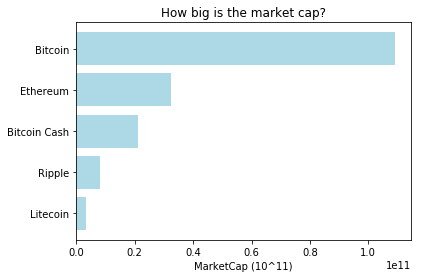

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
names = tuple(map(lambda x: x['name'], data[:5]))
MarketCap = tuple(map(lambda x: x['marketCap']['usd'], data[:5]))
availableSupply = tuple(map(lambda x: x['availableSupply'], data[:5]))

y_pos = np.arange(len(names))
error = np.random.rand(len(names))

ax.barh(y_pos, MarketCap, xerr=error, align='center',
        color='lightblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('MarketCap (10^11)')
ax.set_title('How big is the market cap?')

plt.show()


In [4]:


f = open("filename.txt", "w")
f.write("Writing into a file")
f.close() 

In [5]:
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint

# Configure API key authorization: app_id
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '07769874'
# Configure API key authorization: app_key
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'c95f777654e0656e80b409a2e796e05b'

# create an instance of the API class
api_instance = aylien_news_api.DefaultApi()


opts = { 
    'text': 'bitcoin',
    'not_sentiment_title_polarity': 'negative',
    'not_sentiment_body_polarity': 'negative',
    'published_at_start': 'NOW-7DAYS/DAY',
    'published_at_end': 'NOW/DAY',
    'period': '+1DAY'
}

def callback(res):
    print('res type is ', type(res))
    print('--pprint--')
    pprint(res)
    print('--to dict--')
    pprint(res.to_dict())
    print('res type is ', type(res))
    print('--time_series--')
    pprint(res.time_series)
    print('res type is ', type(res))
    
try: 
    # List time series
    '''
    If the method is called asynchronously, 
    returns the request thread,
    and the callback res is TimeSeriesList obj.
        >>> def callback_function(response):
        >>>     pprint(response)
        >>>
        >>> thread = api.list_time_series(callback=callback_function)
    Else it return a thread with a list
    '''
    api_response = api_instance.list_time_series(**opts)#, callback=callback)
    
    pprint(api_response)
except ApiException as e:
    pprint("Exception when calling DefaultApi->list_time_series: %s\n" % e)
    
    
    

# save file
'''
type(api_response)
f = open("filename.txt", "w")
f.write(api_response)
f.close() 
'''

{'period': '+1DAY',
 'published_at_end': datetime.datetime(2017, 11, 21, 0, 0, tzinfo=tzutc()),
 'published_at_start': datetime.datetime(2017, 11, 14, 0, 0, tzinfo=tzutc()),
 'time_series': [{'count': 167,
                  'published_at': datetime.datetime(2017, 11, 14, 0, 0, tzinfo=tzutc())},
                 {'count': 209,
                  'published_at': datetime.datetime(2017, 11, 15, 0, 0, tzinfo=tzutc())},
                 {'count': 220,
                  'published_at': datetime.datetime(2017, 11, 16, 0, 0, tzinfo=tzutc())},
                 {'count': 213,
                  'published_at': datetime.datetime(2017, 11, 17, 0, 0, tzinfo=tzutc())},
                 {'count': 82,
                  'published_at': datetime.datetime(2017, 11, 18, 0, 0, tzinfo=tzutc())},
                 {'count': 63,
                  'published_at': datetime.datetime(2017, 11, 19, 0, 0, tzinfo=tzutc())},
                 {'count': 234,
                  'published_at': datetime.datetime(2017, 11, 20

'\ntype(api_response)\nf = open("filename.txt", "w")\nf.write(api_response)\nf.close() \n'

In [6]:
print(type(api_response.time_series))

<class 'list'>


In [7]:
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint
import pandas as pd

# Configure API key authorization: app_id
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '07769874'
# Configure API key authorization: app_key
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'c95f777654e0656e80b409a2e796e05b'
# create an instance of the API class
api_instance = aylien_news_api.DefaultApi()
# dataset
NumberOfGoodNewsByDate = []

optsGood = { 
    'text': 'bitcoin',
    #'sentiment_title_polarity': 'positive',
    'sentiment_body_polarity': 'positive',
    'published_at_start': 'NOW-600DAYS/DAY',
    'published_at_end': 'NOW/DAY',
    'period': '+1DAY'
}

optsBad = dict(optsGood)
optsBad.update({
    #'sentiment_title_polarity': 'negative',
    'sentiment_body_polarity': 'negative'
})

try: 
    # GET TimeSeriesList
    resGoodNews = api_instance.list_time_series(**optsGood)
    resBadNews = api_instance.list_time_series(**optsBad)
    
except ApiException as e:
    pprint("Exception when calling DefaultApi->list_time_series: %s\n" % e)

    
NumberOfGoodNewsByDate = list(map(lambda s: {'count': s.count, 'date': s.published_at.strftime("%Y-%m-%d")}, resGoodNews.time_series))
print('--NumberOfGoodNewsByDate--')
pprint(NumberOfGoodNewsByDate[:3])

NumberOfBadNewsByDate = list(map(lambda s: {'count': s.count, 'date': s.published_at.strftime("%Y-%m-%d")}, resBadNews.time_series))
print('--NumberOfGoodNewsByDate--')
pprint(NumberOfBadNewsByDate[:3])

--NumberOfGoodNewsByDate--
[{'count': 7, 'date': '2016-03-31'},
 {'count': 5, 'date': '2016-04-01'},
 {'count': 3, 'date': '2016-04-02'}]
--NumberOfGoodNewsByDate--
[{'count': 8, 'date': '2016-03-31'},
 {'count': 7, 'date': '2016-04-01'},
 {'count': 1, 'date': '2016-04-02'}]


In [36]:
# To pandas
newses = []
for i in range(len(resGoodNews.time_series)):
    row = [NumberOfBadNewsByDate[i]['date'], NumberOfGoodNewsByDate[i]['count'], NumberOfBadNewsByDate[i]['count']]
    newses.append(row)

newses = np.array(newses)
df = pd.DataFrame(newses, index=newses[:, 0], columns=['date','goodnews','badnews'])
df[['goodnews', 'badnews']] = df[['goodnews', 'badnews']].astype(int)
print('--News data frame--')

df.info()
df.head()
df.tail()

--News data frame--
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2016-03-31 to 2017-11-20
Data columns (total 3 columns):
date        600 non-null object
goodnews    600 non-null int64
badnews     600 non-null int64
dtypes: int64(2), object(1)
memory usage: 18.8+ KB


,date,goodnews,badnews
2017-11-16,2017-11-16,118,102
2017-11-17,2017-11-17,105,119
2017-11-18,2017-11-18,54,34
2017-11-19,2017-11-19,43,36
2017-11-20,2017-11-20,142,108


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


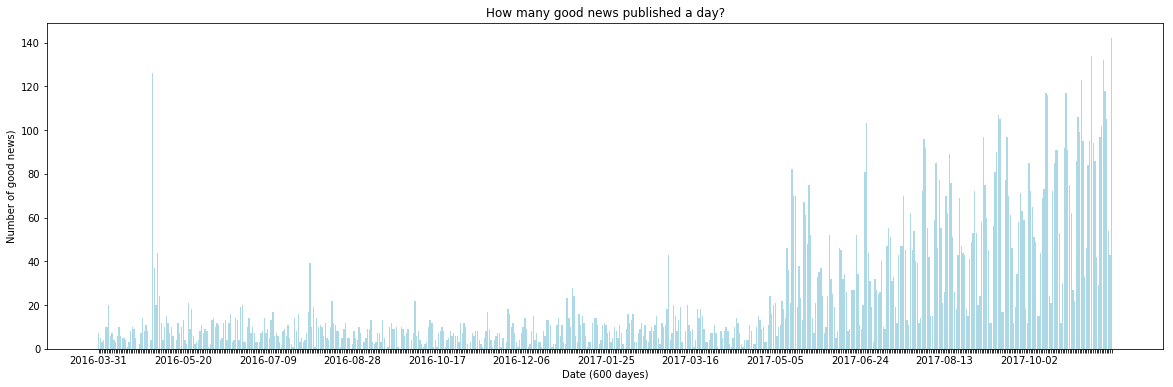

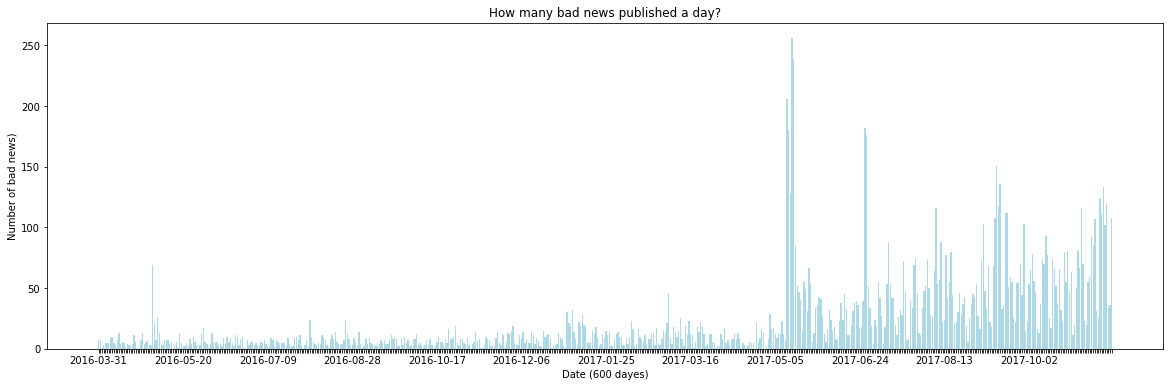

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

# good news
fig, ax = plt.subplots()
dates = df['date'].tolist()
numbers = df['goodnews'].tolist() 

y_pos = np.arange(len(dates))
ax.bar(y_pos, numbers, align='center',
        color='lightblue', ecolor='black')
labels = [date if i%50==0 else '' for i, date in enumerate(dates)]
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
ax.set_ylabel('Number of good news)')
ax.set_title('How many good news published a day?')
plt.show()


# bad news
fig, ax = plt.subplots()
dates = df['date'].tolist()
numbers = df['badnews'].tolist() 

y_pos = np.arange(len(dates))
ax.bar(y_pos, numbers, align='center',
        color='lightblue', ecolor='black')
labels = [date if i%50==0 else '' for i, date in enumerate(dates)]
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
ax.set_ylabel('Number of bad news)')
ax.set_title('How many bad news published a day?')
plt.show()


In [27]:
# get BTC dataset
import requests
import datetime
import json
Nyears = 2
year = datetime.datetime.now().year

# to YYYY-MM-DD
def toYYYY_MM_DD(s):
    return s[6:] +'-'+ s[3:5] +'-'+ s[:2]

BTCdata = []
for _ in range(Nyears):

    headers = {
        'accept': 'application/json',
    }

    params = (
        ('coin', 'bitcoin'),
        ('period', str(year)),
        ('format', 'array'),
    )

    res = requests.get('https://coinmarketcap.northpole.ro/history.json', headers=headers, params=params)
    print(res.text[:100] + '...')
    dic = json.loads(res.text)
    temp = list(  map(lambda x: {'price': x['price']['usd'], 'change24h': x['change24h'], 'marketCap': x['marketCap']['usd'], 'availableSupply': x['availableSupply'], 'volume24': x['volume24']['usd'], 'date': toYYYY_MM_DD(x['date'])}, dic['history']) )
    BTCdata = temp + BTCdata
    year -= 1
    
print('BTCdata head')
print(BTCdata[0])
print('BTCdata last')
print(BTCdata[-1])


{"symbol":"BTC","history":[{"position":1,"name":"Bitcoin","symbol":"BTC","category":"currency","mark...
{"symbol":"BTC","history":[{"position":1,"name":"Bitcoin","symbol":"BTC","category":"currency","mark...
BTCdata head
{'price': 421.919, 'change24h': 0.66, 'marketCap': 6504292756.02, 'availableSupply': 15415975, 'volume24': 58959382.979, 'date': '2016-04-10'}
BTCdata last
{'price': 6505.33, 'change24h': 11.17, 'marketCap': 108496381640.0, 'availableSupply': 16678075, 'volume24': 6610260972.9, 'date': '2017-11-14'}


In [39]:
# To pandas
tempData = []
keys = list(BTCdata[0].keys())
idexOfDate = keys.index('date')
for i in range(len(BTCdata)):
    row = [BTCdata[i][key] for key in keys]
    tempData.append(row)

tempData = np.array(tempData)
BTCdf = pd.DataFrame(tempData, index=tempData[:,idexOfDate], columns=keys)

# to float
keys.remove('date')
BTCdf[keys] = BTCdf[keys].astype(float)

# info
BTCdf.info()
pprint(BTCdf.head())
BTCdf.tail()



<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 2016-04-10 to 2017-11-14
Data columns (total 6 columns):
price              574 non-null float64
change24h          574 non-null float64
marketCap          574 non-null float64
availableSupply    574 non-null float64
volume24           574 non-null float64
date               574 non-null object
dtypes: float64(5), object(1)
memory usage: 31.4+ KB
              price  change24h     marketCap  availableSupply      volume24  \
2016-04-10  421.919       0.66  6.504293e+09       15415975.0  5.895938e+07   
2016-04-11  421.900       0.67  6.504569e+09       15417325.0  7.157449e+07   
2016-04-12  422.051       0.05  6.508533e+09       15421200.0  5.113823e+07   
2016-04-13  424.834       0.63  6.553043e+09       15424950.0  6.939069e+07   
2016-04-14  423.985      -0.21  6.541675e+09       15429025.0  6.935971e+07   

                  date  
2016-04-10  2016-04-10  
2016-04-11  2016-04-11  
2016-04-12  2016-04-12  
2016-04-13  2016-0

,price,change24h,marketCap,availableSupply,volume24,date
2017-11-10,7146.46,-3.14,1.191517e+11,16672825.0,3.275373e+09,2017-11-10
2017-11-11,6743.98,-5.70,1.124522e+11,16674450.0,5.240430e+09,2017-11-11
2017-11-12,6388.54,-4.08,1.065316e+11,16675425.0,5.069268e+09,2017-11-12
2017-11-13,5756.22,-9.70,9.599245e+10,16676300.0,8.768910e+09,2017-11-13
2017-11-14,6505.33,11.17,1.084964e+11,16678075.0,6.610261e+09,2017-11-14


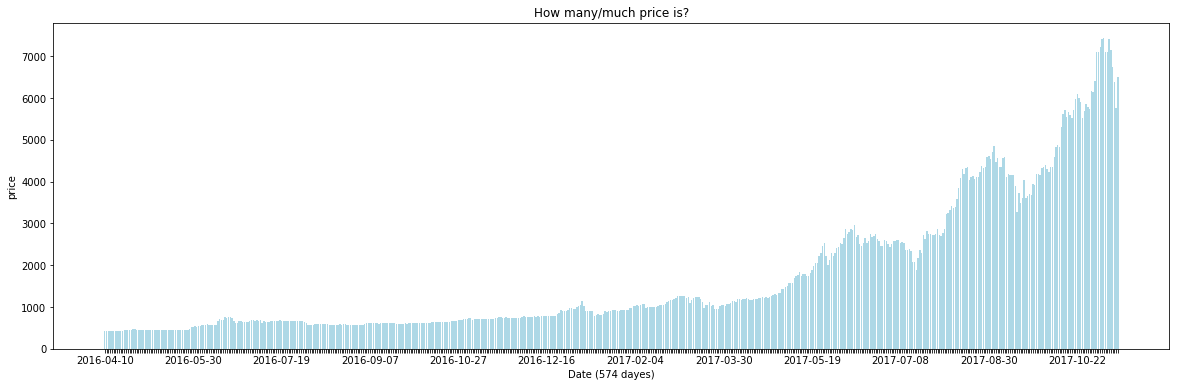

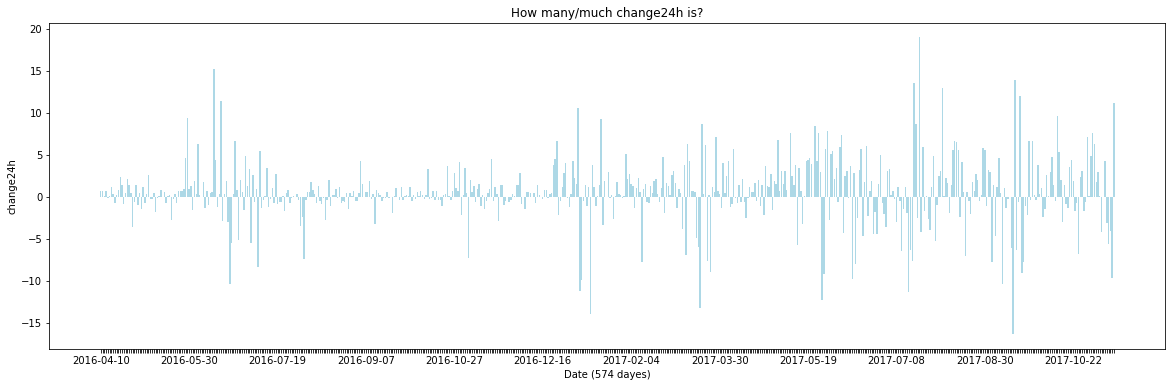

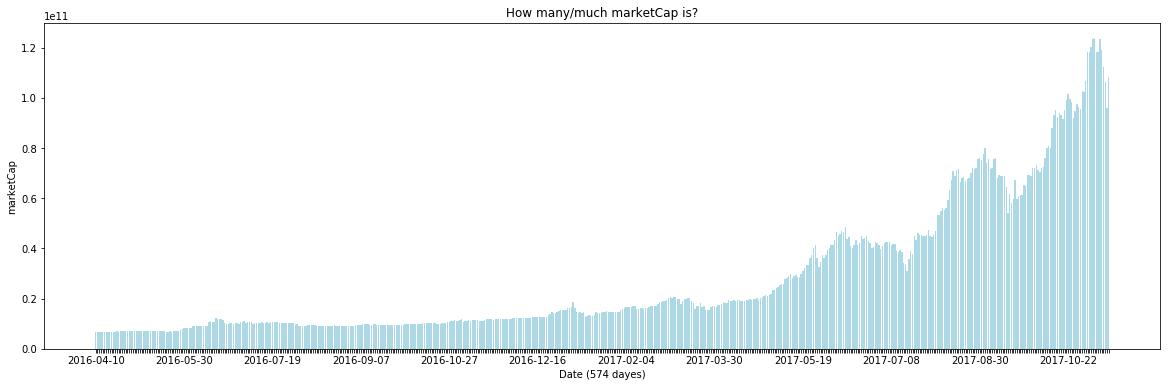

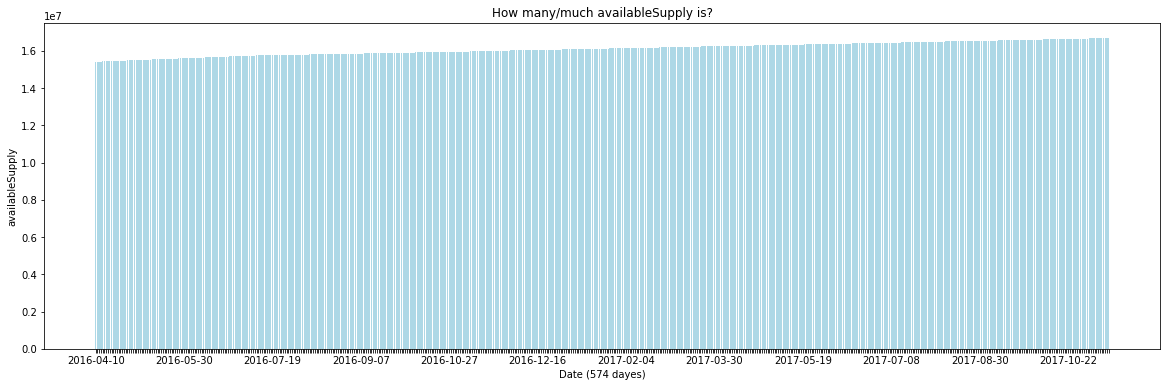

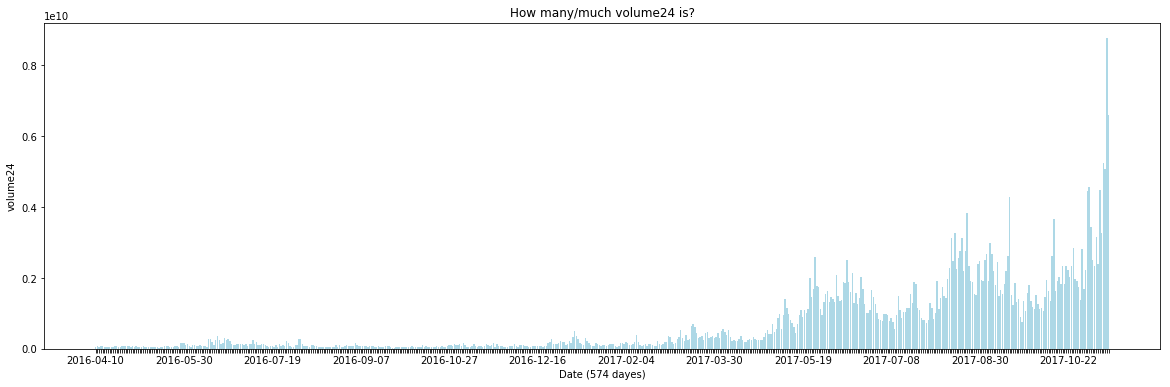

In [40]:
# plot all attrs

for attr in BTCdf.columns[:-1]:
    # Plot BTC price
    fig, ax = plt.subplots()
    dates = BTCdf['date'].tolist() 
    numbers = BTCdf[attr].tolist() 

    y_pos = np.arange(len(dates))
    ax.bar(y_pos, numbers, align='center', color='lightblue', ecolor='black')
    labels = [date if i%50==0 else '' for i, date in enumerate(dates)]
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)

    ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
    ax.set_ylabel(attr)
    ax.set_title('How many/much ' + attr + ' is?')
    plt.show()
    

In [42]:
# Join by date
BTCdfWithoutDate = BTCdf#.drop(columns=['date'])
Alldf = pd.concat([BTCdfWithoutDate, df], axis=1, join='inner', copy=True)

Alldf.info()
Alldf.head()
Alldf.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 2016-04-10 to 2017-11-14
Data columns (total 9 columns):
price              574 non-null float64
change24h          574 non-null float64
marketCap          574 non-null float64
availableSupply    574 non-null float64
volume24           574 non-null float64
date               574 non-null object
date               574 non-null object
goodnews           574 non-null int64
badnews            574 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 44.8+ KB


,price,change24h,marketCap,availableSupply,volume24,date,date,goodnews,badnews
2017-11-10,7146.46,-3.14,1.191517e+11,16672825.0,3.275373e+09,2017-11-10,2017-11-10,86,107
2017-11-11,6743.98,-5.70,1.124522e+11,16674450.0,5.240430e+09,2017-11-11,2017-11-11,42,31
2017-11-12,6388.54,-4.08,1.065316e+11,16675425.0,5.069268e+09,2017-11-12,2017-11-12,29,26
2017-11-13,5756.22,-9.70,9.599245e+10,16676300.0,8.768910e+09,2017-11-13,2017-11-13,97,124
2017-11-14,6505.33,11.17,1.084964e+11,16678075.0,6.610261e+09,2017-11-14,2017-11-14,102,111


In [14]:
# concat previous X days attrs in a row 
#tempData = Alldf[['price']].copy()
#tempData.columns = ['price-1', 'date']
#pprint(tempData.head())
#tempData.tail()
PERIOD = 7
temp = Alldf[['date', 'price', 'volume24', 'change24h', 'goodnews', 'badnews']].values.tolist()

withPrevDays = []
for i in range(2, len(temp)-1):
    prevX = []
    date = [temp[i][0]]
    for day in range(PERIOD):
        prevX.extend(temp[i-day][1:]) # all attr except date at -1 day

    future1dayPrice = [temp[i+1][1]] #target y price
    withPrevDays.append(date + prevX + future1dayPrice)

withPrevDays = np.array(withPrevDays)


keys = ['price', 'volume24', 'change24h', 'goodnews', 'badnews']
keys = ['date'] + [k+'-'+str(day) for day in range(PERIOD) for k in keys] + ['price+1']
SUMdf = pd.DataFrame(withPrevDays, index=withPrevDays[:,0], columns=keys)
SUMdf= SUMdf.drop(columns=['date'])
SUMdf = SUMdf.astype(np.float)
SUMdf.info()
SUMdf.head()


<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 2016-04-12 to 2017-11-13
Data columns (total 29 columns):
price-0       571 non-null float64
volume24-0    571 non-null float64
goodnews-0    571 non-null float64
badnews-0     571 non-null float64
price-1       571 non-null float64
volume24-1    571 non-null float64
goodnews-1    571 non-null float64
badnews-1     571 non-null float64
price-2       571 non-null float64
volume24-2    571 non-null float64
goodnews-2    571 non-null float64
badnews-2     571 non-null float64
price-3       571 non-null float64
volume24-3    571 non-null float64
goodnews-3    571 non-null float64
badnews-3     571 non-null float64
price-4       571 non-null float64
volume24-4    571 non-null float64
goodnews-4    571 non-null float64
badnews-4     571 non-null float64
price-5       571 non-null float64
volume24-5    571 non-null float64
goodnews-5    571 non-null float64
badnews-5     571 non-null float64
price-6       571 non-null float64
volume24-

,price-0,volume24-0,goodnews-0,badnews-0,price-1,volume24-1,goodnews-1,badnews-1,price-2,volume24-2,...,badnews-4,price-5,volume24-5,goodnews-5,badnews-5,price-6,volume24-6,goodnews-6,badnews-6,price+1
2016-04-12,422.051,5.113823e+07,10.0,13.0,421.900,7.157449e+07,6.0,7.0,421.919,5.895938e+07,...,124.0,6388.540,5.069268e+09,29.0,26.0,6743.980,5.240430e+09,42.0,31.0,424.834
2016-04-13,424.834,6.939069e+07,6.0,4.0,422.051,5.113823e+07,10.0,13.0,421.900,7.157449e+07,...,111.0,5756.220,8.768910e+09,97.0,124.0,6388.540,5.069268e+09,29.0,26.0,423.985
2016-04-14,423.985,6.935971e+07,5.0,6.0,424.834,6.939069e+07,6.0,4.0,422.051,5.113823e+07,...,3.0,6505.330,6.610261e+09,102.0,111.0,5756.220,8.768910e+09,97.0,124.0,424.224
2016-04-15,424.224,4.537076e+07,5.0,5.0,423.985,6.935971e+07,5.0,6.0,424.834,6.939069e+07,...,7.0,421.919,5.895938e+07,3.0,3.0,6505.330,6.610261e+09,102.0,111.0,429.333
2016-04-16,429.333,5.408007e+07,4.0,1.0,424.224,4.537076e+07,5.0,5.0,423.985,6.935971e+07,...,13.0,421.900,7.157449e+07,6.0,7.0,421.919,5.895938e+07,3.0,3.0,430.841


In [15]:
from sklearn.model_selection import train_test_split

# split to training, testing data
train, test = train_test_split(SUMdf, test_size=0.2)
train.sort_index(inplace=True)
test.sort_index(inplace=True)
#pprint(test)


# trainX, testX
trainX = train.iloc[:,:-1] 
testX = test.iloc[:,:-1] 

# trainY, testY
trainY = train['price+1'] 
testY = test['price+1'] 

# trainY_clf
#trainY_clf = trainY.copy()
#trainY_clf.map(lambda x: x.d)
trainY_clf = np.array([ 1 if trainY.iloc[i] > trainX.iloc[i]['price-0'] else 0 for i in range(len(trainX)) ]) 
trainY_clf = pd.Series(trainY_clf, index=trainY.index) 
testY_clf = np.array([ 1 if testY.iloc[i] > testX.iloc[i]['price-0'] else 0 for i in range(len(testX)) ]) 
testY_clf = pd.Series(testY_clf, index=testY.index) 
'''
# the y for regression, price value
y = withoutDate[:,-1]

# the y for classifiation, 1 goes up, 0 goes down
y_clf = [ 1 if y[i] > X[i, 0] else 0 for i in range(len(X)) ] 
'''

'''
pprint(X[:3])
pprint(y[:10])
pprint(y_clf[:10])

'''
#print(y_clf[:100])
print('test:',len(test), 'train:', len(train))
print('################ train ################')
print('trainX-------------------------')
pprint(trainX.head())
print('trainY-------------------------')
pprint(trainY.head())
print('trainY_clf-------------------------')
pprint(trainY_clf.head())
print('################ test ################')
print('testX-------------------------')
pprint(testX.head())
print('testY-------------------------')
pprint(testY.head())
print('testY_clf-------------------------')
pprint(testY_clf.head())

test: 115 train: 456
################ train ################
trainX-------------------------
            price-0    volume24-0  goodnews-0  badnews-0  price-1  \
2016-04-13  424.834  6.939069e+07         6.0        4.0  422.051   
2016-04-14  423.985  6.935971e+07         5.0        6.0  424.834   
2016-04-16  429.333  5.408007e+07         4.0        1.0  424.224   
2016-04-17  430.841  3.736369e+07         1.0        4.0  429.333   
2016-04-18  427.532  5.195711e+07         3.0        3.0  430.841   

              volume24-1  goodnews-1  badnews-1  price-2    volume24-2  \
2016-04-13  5.113823e+07        10.0       13.0  421.900  7.157449e+07   
2016-04-14  6.939069e+07         6.0        4.0  422.051  5.113823e+07   
2016-04-16  4.537076e+07         5.0        5.0  423.985  6.935971e+07   
2016-04-17  5.408007e+07         4.0        1.0  424.224  4.537076e+07   
2016-04-18  3.736369e+07         1.0        4.0  429.333  5.408007e+07   

              ...      goodnews-4  badnews-4   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
# neural_network Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report


scaler = Normalizer().fit(trainX)
normalizedTrainX = scaler.transform(trainX)
normalizedTestX = scaler.transform(testX)
# summarize transformed data
numpy.set_printoptions(precision=3) # show digit to .001
print('normalizedTrainX', normalizedTrainX[0], '...')
#print(normalizedTestX[:3], '...')


clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, ), random_state=1)
clf.fit(normalizedTrainX, trainY_clf)
testY_predicct = clf.predict(normalizedTestX)
print('########################################################################')
print('train data score', clf.score(normalizedTrainX, trainY_clf))
print('test data score', clf.score(normalizedTestX, testY_clf))
print(classification_report(testY_clf, testY_predicct, labels=[1, 0], target_names=['rise', 'drop']))
print('########################################################################')
 
print('sample of testY_predicct', testY_predicct)
print(0 in testY_predicct)
'''
clf.fit(X, y_clf)   
y_predicct = clf.predict(X)
print(clf.score(X, y_clf))
print(y_predicct)
print(0 in y_predicct)
'''

normalizedTrainX [  3.512e-08   5.737e-03   4.960e-10   3.307e-10   3.489e-08   4.228e-03
   8.267e-10   1.075e-09   3.488e-08   5.917e-03   4.960e-10   5.787e-10
   3.488e-08   4.874e-03   2.480e-10   2.480e-10   5.378e-07   5.465e-01
   8.433e-09   9.177e-09   4.759e-07   7.250e-01   8.019e-09   1.025e-08
   5.282e-07   4.191e-01   2.398e-09   2.150e-09] ...
########################################################################
train data score 0.68201754386
test data score 0.530434782609
             precision    recall  f1-score   support

       rise       0.54      0.87      0.67        62
       drop       0.47      0.13      0.21        53

avg / total       0.51      0.53      0.45       115

########################################################################
sample of testY_predicct [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

'\nclf.fit(X, y_clf)   \ny_predicct = clf.predict(X)\nprint(clf.score(X, y_clf))\nprint(y_predicct)\nprint(0 in y_predicct)\n'

In [25]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(trainX, trainY_clf)
testY_predicct = clf.predict(testX) 

print('########################################################################')
print('train data score', clf.score(trainX, trainY_clf))
print('test data score', clf.score(testX, testY_clf))
print(classification_report(testY_clf, testY_predicct, labels=[1, 0], target_names=['rise', 'drop']))
print('########################################################################')
print('feature_importances: ', clf.feature_importances_)

print('sample of testY_predicct: ', testY_predicct)
print(0 in testY_predicct)

########################################################################
train data score 0.982456140351
test data score 0.486956521739
             precision    recall  f1-score   support

       rise       0.52      0.68      0.59        62
       drop       0.41      0.26      0.32        53

avg / total       0.47      0.49      0.47       115

########################################################################
feature_importances:  [ 0.036  0.035  0.036  0.032  0.034  0.043  0.041  0.043  0.045  0.023
  0.028  0.029  0.029  0.044  0.024  0.038  0.032  0.048  0.037  0.028
  0.04   0.039  0.043  0.025  0.046  0.042  0.035  0.025]
sample of testY_predicct:  [0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 0]
True


0.993090786285
[ 428.157  435.916  449.961  452.971  458.541  452.395  447.649  538.111
  578.211  637.574]


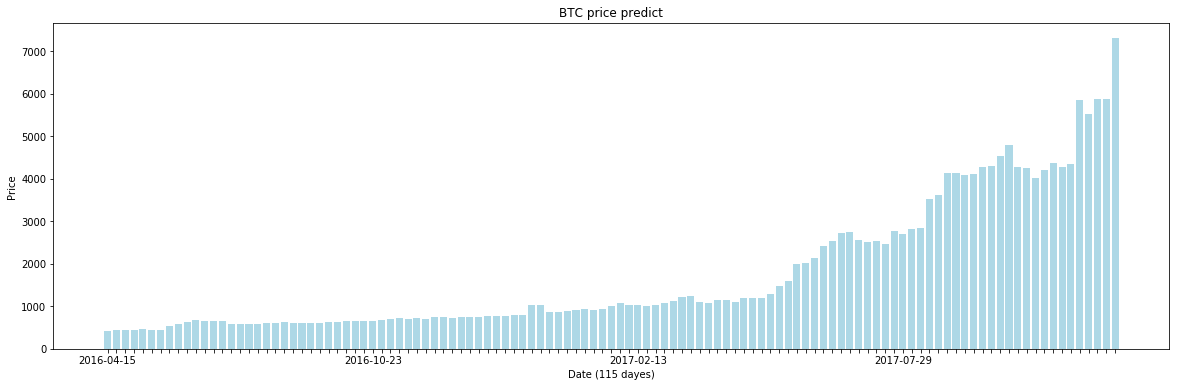

In [18]:
# sklearn.neural_network.MLPRegressor
from sklearn.ensemble.forest import RandomForestRegressor

reg = RandomForestRegressor(max_depth=10)
                       
reg.fit(trainX, trainY)   
print(reg.score(testX, testY))
y_predicct = reg.predict(testX)
print(y_predicct[:10])



# Plot BTC price
fig, ax = plt.subplots()
dates = testY.index
numbers = y_predicct

y_pos = np.arange(len(dates))
ax.bar(y_pos, numbers, align='center', color='lightblue', ecolor='black')
labels = [date if i%30==0 else '' for i, date in enumerate(dates)]
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
ax.set_ylabel('Price')
ax.set_title('BTC price predict')
plt.show()


-0.355141507905
[ 0.075  0.039  0.036  0.034  0.039  0.04   0.038  0.041  0.032  0.034]


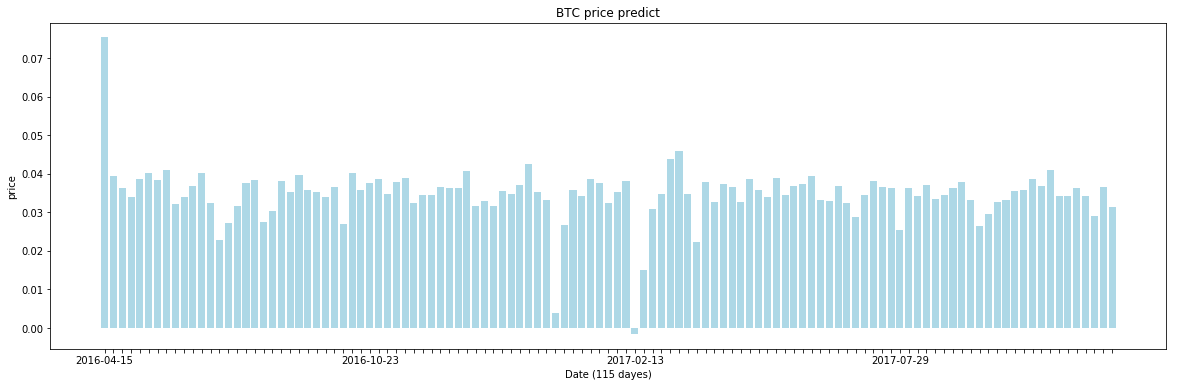

In [19]:
# sklearn.neural_network.MLPRegressor
# neural_network does really bad, 500 dataset is too small!

from sklearn.neural_network import MLPRegressor

normalizedTrainY = scaler.transform([trainY])[0]
normalizedTestY = scaler.transform([testY])[0]

reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=100, learning_rate='adaptive', random_state=1)
reg.fit(normalizedTrainX, normalizedTrainY)   
print(reg.score(normalizedTestX, normalizedTestY))
y_predicct = reg.predict(normalizedTestX)
print(y_predicct[:10])



# Plot BTC price
fig, ax = plt.subplots()
dates = testY.index
numbers = y_predicct

y_pos = np.arange(len(dates))
ax.bar(y_pos, numbers, align='center', color='lightblue', ecolor='black')
labels = [date if i%30==0 else '' for i, date in enumerate(dates)]
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
ax.set_ylabel('price')
ax.set_title('BTC price predict')
plt.show()
